# **Hate Speech Detector**

In [ ]:
#import libraries
import pandas as pd
import numpy as np

In [ ]:
dataset=pd.read_csv('/content/train.csv')

In [ ]:
dataset["labels"]=dataset["class"].map({0:"Hate Speech",1:"Offensive Language",2:"No Hate or Offensive Language"})

In [ ]:
data=dataset[["tweet","labels"]]

In [ ]:
import re
#For removing stopwords and stemming the words
import nltk

In [ ]:
# importing Stopwords
!python -m nltk.downloader stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))


/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#importing stemming
stemmer=nltk.SnowballStemmer("english")


In [ ]:
!pip install string
import string


ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string


In [ ]:
# Data Cleaning
def clean_data(text):
    text=str(text).lower()
    text=re.sub('http?://\S+|www\.S+', '',text)
    text=re.sub('\[.*?\]','',text)
    text=re.sub('<_*?>+','',text)
    text=re.sub('[%sS]' %re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    # Stop Words Removal
    text=[word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    # Stemming
    text=[stemmer.stem(word)for word in text.split(' ')]
    text=" ".join(text)
    return text


In [ ]:
data["tweet"]=data["tweet"].apply(clean_data)


<ipython-input-10-7cdb172179f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]=data["tweet"].apply(clean_data)


In [ ]:
X=np.array(data["tweet"])
y=np.array(data["labels"])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
cv=CountVectorizer()
X= cv.fit_transform(X)

In [ ]:
#ML Model

# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
dt = DecisionTreeClassifier()

# Fit the model with both X_train and y_train
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(X_test)

# Confusion Matrix and Accuracy Check
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test, y_pred)
cn

array([[ 147,   39,  279],
       [  32, 1138,  209],
       [ 230,  211, 5894]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

ERROR: Could not find a version that satisfies the requirement seaborn-colormaps (from versions: none)
ERROR: No matching distribution found for seaborn-colormaps


<Axes: >

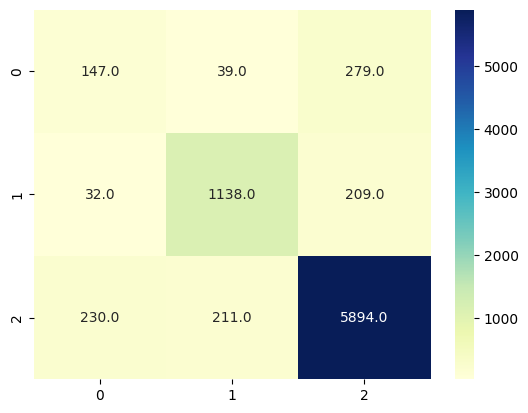

In [ ]:
!pip install seaborn-colormaps
sns.heatmap(cn, annot=True, fmt=".1f", cmap="YlGnBu")


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8777356645066634